In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving NVDA_yfinance_clean.csv to NVDA_yfinance_clean.csv
User uploaded file "NVDA_yfinance_clean.csv" with length 240859 bytes


In [6]:
import pandas as pd

df = pd.read_csv('NVDA_yfinance_clean.csv')
df['Date'] = pd.to_datetime(df['Date'])

date_input = input("Enter Date (YYYY-MM-DD): ")

try:
    # Convert the input date string to a datetime object for accurate comparison
    date_to_find = pd.to_datetime(date_input)
    result = df[df['Date'] == date_to_find]

    if result.empty:
        print("No data found for the specified date.")
    else:
        open_price = result['Open'].values[0]
        close_price = result['Close'].values[0]
        volume = result['Volume'].values[0]

        change_percent = ((close_price - open_price) / open_price) * 100

        print("\n📊 NVIDIA Stock Data")
        print("-------------------------")
        print("Open:", open_price)
        print("Close:", close_price)
        print("Change %:", round(change_percent,2))
        print("Volume:", volume)
except ValueError:
    print("Invalid date format. Please enter the date in YYYY-MM-DD format.")

Enter Date (YYYY-MM-DD): 2020-2-01
No data found.


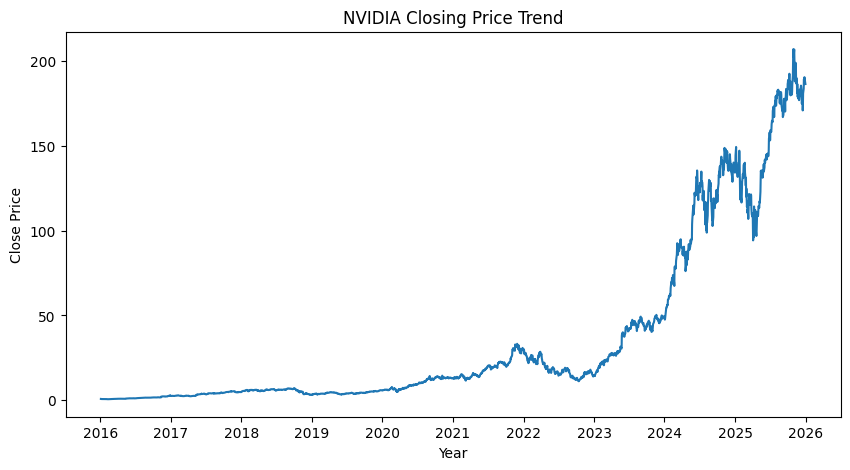

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'])
plt.title("NVIDIA Closing Price Trend")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.show()


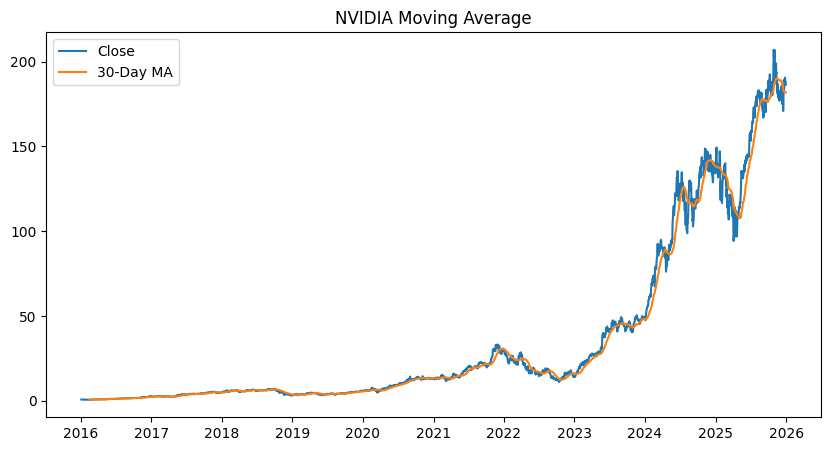

In [8]:
df['MA30'] = df['Close'].rolling(30).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA30'], label='30-Day MA')
plt.legend()
plt.title("NVIDIA Moving Average")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df['Prediction'] = df['Close'].shift(-1)
df = df.dropna()

X = df[['Open','High','Low','Volume']]
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Accuracy:", model.score(X_test, y_test))


Model Accuracy: 0.9982449385631227
